In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# Description
Task 2: Customer Segmentation 

Description:

*  Dataset (Recommended): Mall Customer (Kaggle)
*  Cluster customers into segments based on income and spending score
*  Perform scaling and visual exploration of groupings
*  Apply K-Means clustering and determine optimal number of clusters
*  Visualize clusters using 2D plots

 Tools & Libraries:
 Python
 Pandas
 Matplotlib
 Scikit-learn
 
 Covered Topics:
 Clustering |  Unsupervised learning
 
 Bonus:
 Try different clustering algorithms (e.g., DBSCAN). 
Analyze average spending per cluster

# Import Libraries

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [4]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
print(f'rows: {len(df)}')
print(f'cols: {len(df.columns)}')

rows: 200
cols: 5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Feature Selection

In [10]:
# We’ll use Annual Income and Spending Score for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Scaling Features

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find Optimal K (Elbow Method)

In [12]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

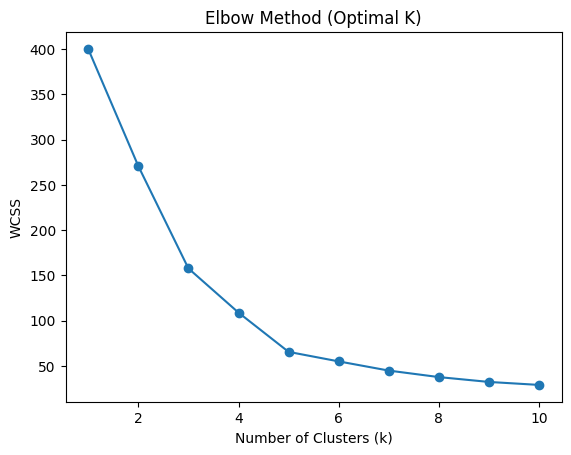

In [13]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method (Optimal K)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

# K-Means Clustering

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # choose k=5 from elbow
y_kmeans = kmeans.fit_predict(X_scaled)

df["Cluster"] = y_kmeans

print("\nCluster counts:")
print(df["Cluster"].value_counts())


Cluster counts:
Cluster
0    81
4    39
1    35
2    23
3    22
Name: count, dtype: int64


# Visualize Clusters

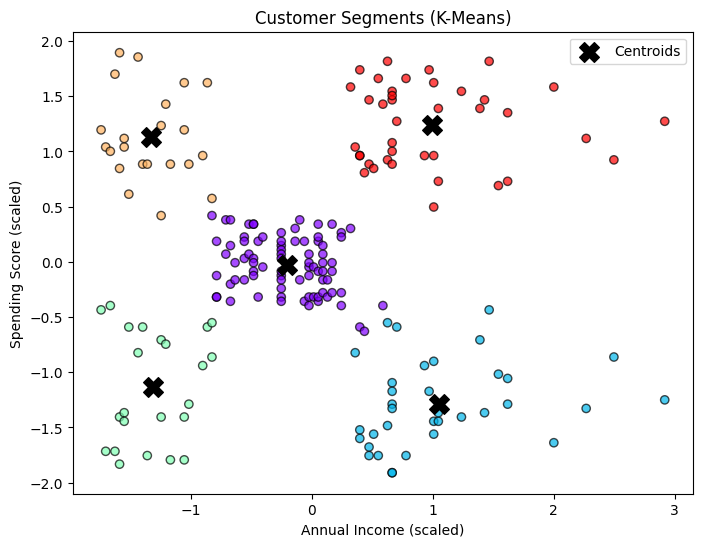

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1], 
    c=y_kmeans, cmap="rainbow", alpha=0.7, edgecolors="k"
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
    s=200, c="black", marker="X", label="Centroids"
)
plt.title("Customer Segments (K-Means)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

# Cluster Analysis

In [17]:
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\nAverage Income & Spending per Cluster:")
print(cluster_summary)


Average Income & Spending per Cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 88.200000               17.114286
2                 26.304348               20.913043
3                 25.727273               79.363636
4                 86.538462               82.128205


# Bonus: DBSCAN Clustering

In [18]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_db = dbscan.fit_predict(X_scaled)

df["DBSCAN_Cluster"] = y_db

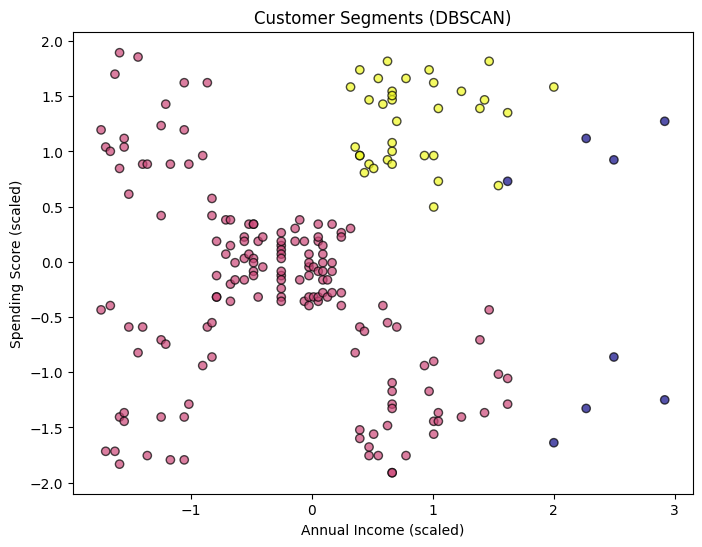

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=y_db, cmap="plasma", alpha=0.7, edgecolors="k"
)
plt.title("Customer Segments (DBSCAN)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

In [21]:
print("\nDBSCAN Cluster Counts:")
print(df["DBSCAN_Cluster"].value_counts())


DBSCAN Cluster Counts:
DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64
